# Get Started with Quantum Computing and Qiskit

This workshop is hosted at: https://github.com/mtreinish/qiskit-workshop

To get started we'll need to install Qiskit. If you have Python >= 3.5 and Jupyter installed you can run this locally. Or alternatively you can run this in Google Colab (if you have a Google account):
https://colab.research.google.com/github/mtreinish/qiskit-workshop/blob/master/Workshop.ipynb

Once you have the workshop running if you have not installed Qiskit before (or you are running in colab) you can uncomment and run the following cell to install it:

In [1]:
#!pip install qiskit

Once we have Qiskit is installed we want to test that it's working properly.

In [2]:
import qiskit
qiskit.__version__

'0.8.0'

## Signup for the Quantum Experience

While for the most part we'll use local simulation for this workshop, if you want to run anything on a real quantum device you'll need an account on the Quantum Experience. We'll do this before moving on:

1. Visit: https://quantumexperience.ng.bluemix.net/qx/ and signup for an account. You can use a SSO from an IBMid, LinkedIn, Github, Google, or Twitter in addition to creating a new account.

![Login Box](QX_login.png)



2. After you're logged into your new account visit: https://quantumexperience.ng.bluemix.net/qx/account/advanced where you'll need to generate an **API Token**. Once you've generated a token you'll want to copy it so we can use Qiskit to store it locally so it can be used for accessing the quantum devices.


In [3]:
# Enable your account on Qiskit, replace 'My_API_Token' with your newly generated token
#qiskit.IBMQ.save_account('My_API_Token')
qiskit.IBMQ.load_accounts()
# After loading credentials we query the backends
qiskit.IBMQ.backends()

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

In [4]:
from qiskit.tools.jupyter import *

In [5]:
# Show Quantum Device Overiew
%qiskit_backend_overview

In [6]:
# Show individual backend details
backend = qiskit.IBMQ.get_backend('ibmqx2')
%qiskit_backend_monitor backend

## Running on a Quantum Device
In any of the examples below you can simply replace the use of the `backend_sim` variable with `backend` in any calls to `qiskit.execute()` and it'll run the circuit on a real quantum device.

# The Qubit

# The Quantum Not Gate

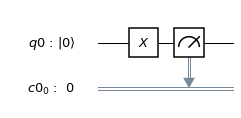

In [7]:
# Create a Quantum Register with 1 qubit (wire).
qr = qiskit.QuantumRegister(1)

# Create a Classical Register with 1 bit (double wire).
cr = qiskit.ClassicalRegister(1)

# Create a Quantum Circuit from the quantum and classical registers
circ = qiskit.QuantumCircuit(qr, cr)

# Place an X gate on the qubit wire. The registers are zero-indexed.
circ.x(qr[0])

# Measure the qubit into the classical register
circ.measure(qr, cr)

# Draw the circuit
circ.draw(output='mpl')

In [8]:
# Use Aer's qasm_simulator
backend_sim = qiskit.Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator, running it 100 times.
job_sim = qiskit.execute(circ, backend_sim, shots=100)

# Grab the results from the job.
result_sim = job_sim.result()

# Print the counts, which are contained in a Python dictionary
counts = result_sim.get_counts(circ)
print(counts)

{'1': 100}


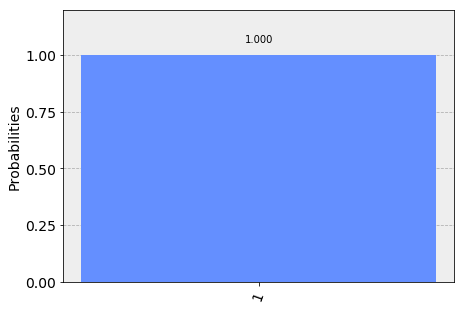

In [9]:
# Plot the results on a bar chart
qiskit.tools.visualization.plot_histogram(counts)

# Quantum Coin Flipping

In [10]:
import numpy as np

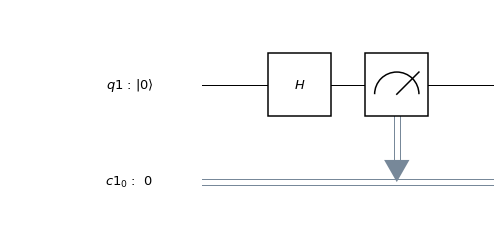

In [11]:
# Create a Quantum Register with 1 qubit (wire).
qr = qiskit.QuantumRegister(1)

# Create a Classical Register with 1 bit (double wire).
cr = qiskit.ClassicalRegister(1)

# Create a Quantum Circuit from the quantum and classical registers
circ = qiskit.QuantumCircuit(qr, cr)

# Place an Hadamard gate on the qubit wire
circ.h(qr[0])

# Measure the qubit into the classical register
circ.measure(qr, cr)

# Draw the circuit
circ.draw(output='mpl', scale=1.5)

In [12]:
# Use Aer's qasm_simulator
backend_sim = qiskit.Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator, running it 100 times.
job_sim = qiskit.execute(circ, backend_sim, shots=100)

# Grab the results from the job.
result_sim = job_sim.result()

# Print the counts, which are contained in a Python dictionary
counts = result_sim.get_counts(circ)
print(counts)

{'0': 56, '1': 44}


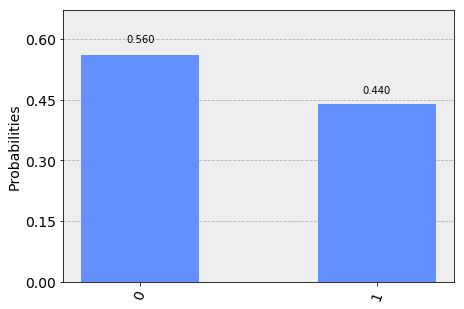

In [13]:
# Plot the results on a bar chart
qiskit.tools.visualization.plot_histogram(counts)

This demonstrates the first principle fundamental princple of quantum mechanics that provide a good starting point for understanding quantum computation. The priciple of superposition, that a physical system in a definite state can still behave randomly.

# Multi Qubit Gates

# Entanglement

In [14]:
# Creating registers
q2 = qiskit.QuantumRegister(2)
c1 = qiskit.ClassicalRegister(1)
c2 = qiskit.ClassicalRegister(2)

# quantum circuit to make an entangled bell state 
bell = qiskit.QuantumCircuit(q2)
bell.h(q2[0])
bell.cx(q2[0], q2[1])

# quantum circuit to measure q0 in the standard basis
measureIZ = qiskit.QuantumCircuit(q2, c1)
measureIZ.measure(q2[0], c1[0])
bellIZ = bell + measureIZ

# quantum circuit to measure q0 in the superposition basis 
measureIX = qiskit.QuantumCircuit(q2, c1)
measureIX.h(q2[0])
measureIX.measure(q2[0], c1[0])
bellIX = bell + measureIX

# quantum circuit to measure q1 in the standard basis
measureZI = qiskit.QuantumCircuit(q2, c1)
measureZI.measure(q2[1], c1[0])
bellZI = bell + measureZI

# quantum circuit to measure q1 in the superposition basis 
measureXI = qiskit.QuantumCircuit(q2, c1)
measureXI.h(q2[1])
measureXI.measure(q2[1], c1[0])
bellXI = bell + measureXI

# quantum circuit to measure q in the standard basis 
measureZZ = qiskit.QuantumCircuit(q2, c2)
measureZZ.measure(q2[0], c2[0])
measureZZ.measure(q2[1], c2[1])
bellZZ = bell + measureZZ

# quantum circuit to measure q in the superposition basis 
measureXX = qiskit.QuantumCircuit(q2, c2)
measureXX.h(q2[0])
measureXX.h(q2[1])
measureXX.measure(q2[0], c2[0])
measureXX.measure(q2[1], c2[1])
bellXX = bell + measureXX

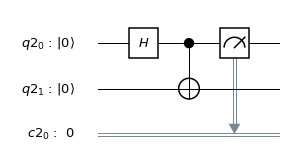

In [15]:
bellIZ.draw(output='mpl')

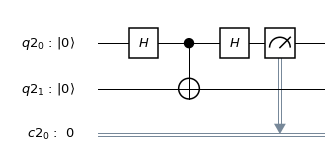

In [16]:
bellIX.draw(output='mpl')

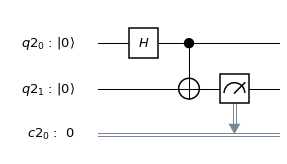

In [17]:
bellZI.draw(output='mpl')

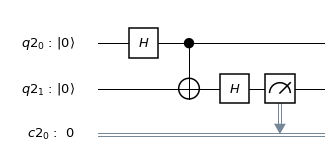

In [18]:
bellXI.draw(output='mpl')

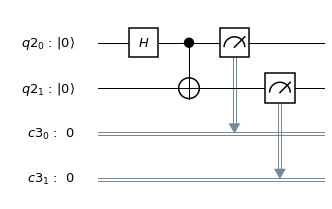

In [19]:
bellZZ.draw(output='mpl')

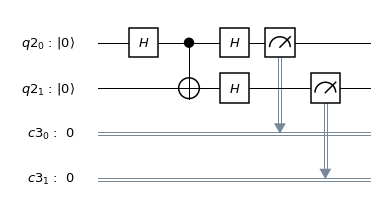

In [20]:
bellXX.draw(output='mpl')

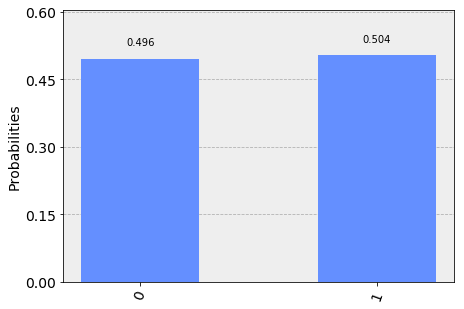

In [21]:
circuits = [bellIZ,bellIX,bellZI,bellXI,bellZZ,bellXX]
job = qiskit.execute(circuits, backend_sim)
result = job.result()

qiskit.tools.visualization.plot_histogram(result.get_counts(bellIZ))

In [22]:
result.get_counts(bellIZ)

{'0': 508, '1': 516}

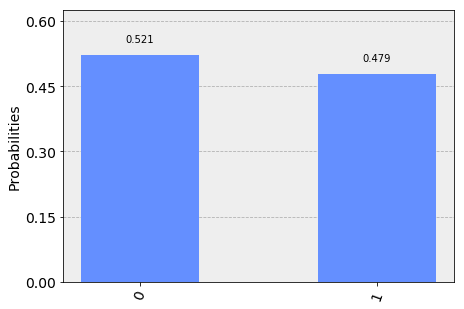

In [23]:
qiskit.tools.visualization.plot_histogram(result.get_counts(bellIX))

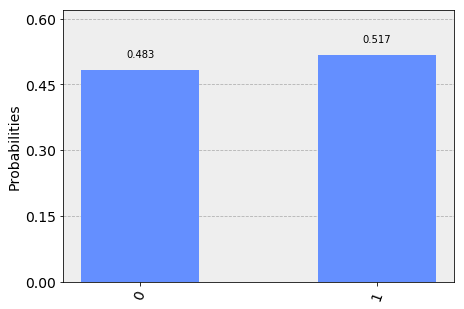

In [24]:
qiskit.tools.visualization.plot_histogram(result.get_counts(bellZI))

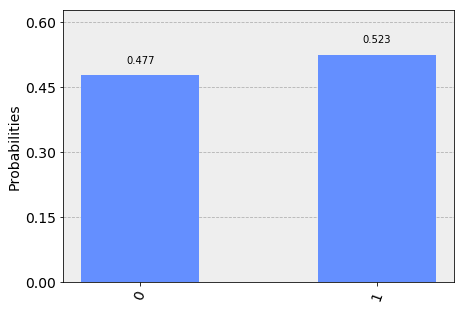

In [25]:
qiskit.tools.visualization.plot_histogram(result.get_counts(bellXI))

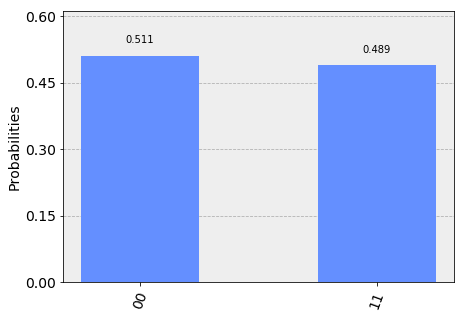

In [26]:
qiskit.tools.visualization.plot_histogram(result.get_counts(bellZZ))

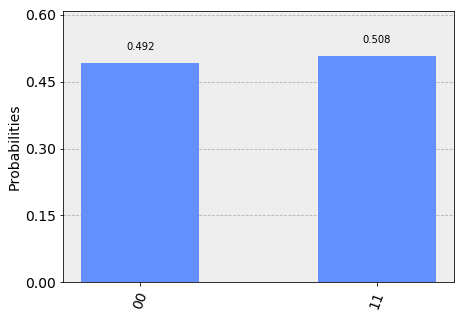

In [27]:
qiskit.tools.visualization.plot_histogram(result.get_counts(bellXX))

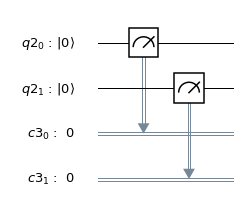

In [28]:
# quantum circuit to make a mixed state 
mixed1 = qiskit.QuantumCircuit(q2, c2)
mixed2 = qiskit.QuantumCircuit(q2, c2)
mixed2.x(q2)
mixed1.measure(q2[0], c2[0])
mixed1.measure(q2[1], c2[1])
mixed2.measure(q2[0], c2[0])
mixed2.measure(q2[1], c2[1])

mixed1.draw(output='mpl')

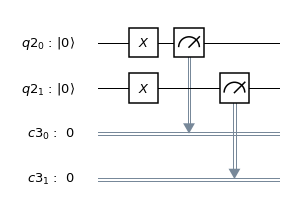

In [29]:
mixed2.draw(output='mpl')

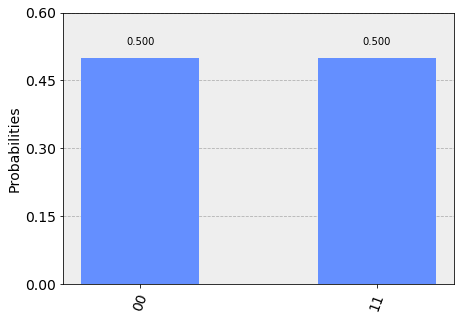

In [30]:
mixed_state = [mixed1,mixed2]
job = qiskit.execute(mixed_state, backend_sim)
result = job.result()

counts1 = result.get_counts(mixed_state[0])
counts2 = result.get_counts(mixed_state[1])

import collections
ground = collections.Counter(counts1)
excited = collections.Counter(counts2)
qiskit.tools.visualization.plot_histogram(ground + excited)

We do see the same kind of correlation indeed as we observed in the "bell_measureZZ" circuit. But we know this is not an entangled state! All we have done is leave the qubits in their ground state for some of the shots and flip both qubits for some of the shots. This is called a mixed state and it is a classical state. Now, would we observe a similar outcome if we measured this mixed state in the superposition basis? We will leave this for the reader to try.

# More Information

This is just a starting point for learning about quantum computation. There are a several additional resources where to go for more information on this topic. This workshop was heavily based off of the community notebooks in the [qiskit-tutorials repository](https://github.com/Qiskit/qiskit-tutorials) these continue on and explore these topics in more detail:

1. **Amplitude and Phase**: https://github.com/Qiskit/qiskit-tutorials/blob/master/community/terra/qis_intro/amplitude_and_phase.ipynb
2. **Testing Entanglement**: https://github.com/Qiskit/qiskit-tutorials/blob/master/community/terra/qis_intro/entanglement_testing.ipynb
3. **Quantum Teleportation and Superdense Coding**: https://github.com/Qiskit/qiskit-tutorials/blob/master/community/terra/qis_intro/teleportation_superdensecoding.ipynb

The qiskit-tutorials repository also contains many other Jupyter notebooks covering a variety of topics. One thing that can be fun is applying these principles to make games: https://github.com/Qiskit/qiskit-tutorials/tree/master/community/games contains several games on Quantum computers.

Another place to get more information is: https://learnqiskit.gitbook.io/developers/ which is still a work in progress but goes into more detail on the topics covered here.